# Tutorial

Import ProjectPy and scanpy

In [1]:
! pip install -i https://test.pypi.org/simple/ ProjectPy==0.1.6
! pip install scanpy
import scanpy as sc
import ProjectPy

Looking in indexes: https://test.pypi.org/simple/
  Attempting uninstall: ProjectPy
    Found existing installation: ProjectPy 0.1.5
    Uninstalling ProjectPy-0.1.5:
      Successfully uninstalled ProjectPy-0.1.5


/Users/asherbaraban/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


Reading in the datasets with scanpy.

In [2]:
patterns = sc.read_h5ad('patterns_anndata.h5ad')
dataset = sc.read_h5ad('test_target.h5ad')

In this case, the patterns and dataset do not have the same genes, so we take the set intersection of their genes.

In [3]:
dataset_filtered, patterns_filtered = ProjectPy.projection_object.filterAnnDatas(dataset, patterns, 'gene_id')

(55371, 428) dataset filter shape
(80, 428) patterns filter shape


Now that the datasets have the same genes, we can now run a regression to find the use of the patterns in the dataset. In our case, the "discovered" matrix can be found in dataset_filtered.obsm['retinaProject']

In [4]:
ProjectPy.projection_object.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'retinaProject', alpha=.01, L1=.01)

(55371, 80)


Now that we have our pattern matrix as described in Enter the Matrix: Factorization Uncovers Knowledge of Omics. To see if certain features correlate with a cell type we create a pearson matrix and plot.

[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


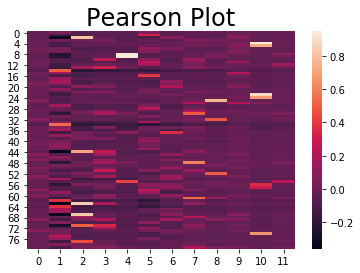

In [5]:
ProjectPy.projection_object.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'retinaProject', 'PearsonRetina', True)

Now we are going to project the pattern matrix down into 2-dimension and then plot it colored by cell type.

[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


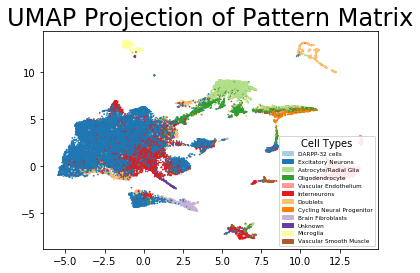

In [6]:
ProjectPy.projection_object.UMAP_Projection(dataset_filtered, 'CellType', 'retinaProject', 'retinaUMAP', 12, plot=True)

Now we are going to make plots that show the usage of each feature in each sample. Each point's/cell's color is based on the coefficient of the feature. Also, above each plot a few metrics are displayed to better understand the usage of that feature in the dataset.

Number of nonzero cells 3922
Percentage of nonzero cells 7.083130158386158
Max coefficient 0.1734013
Average coefficient 0.002191317


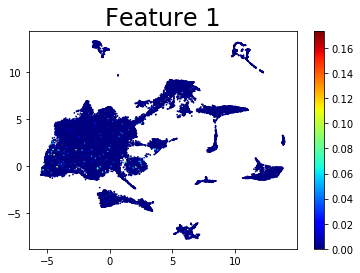

Number of nonzero cells 7290
Percentage of nonzero cells 13.16573657690849
Max coefficient 0.29678908
Average coefficient 0.00716726


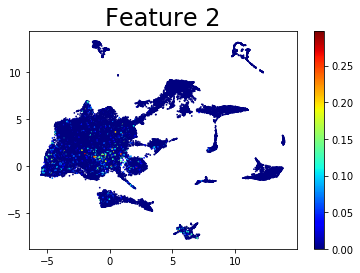

Number of nonzero cells 14969
Percentage of nonzero cells 27.034006971158185
Max coefficient 0.5433935
Average coefficient 0.028382646


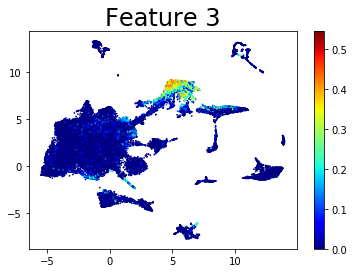

Number of nonzero cells 7648
Percentage of nonzero cells 13.812284408806052
Max coefficient 2.3006158
Average coefficient 0.01184483


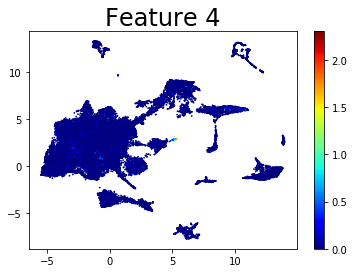

Number of nonzero cells 7525
Percentage of nonzero cells 13.59014646656192
Max coefficient 6.971791
Average coefficient 0.0513844


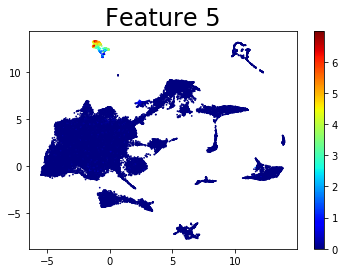

Number of nonzero cells 9596
Percentage of nonzero cells 17.33037149410341
Max coefficient 5.4137363
Average coefficient 0.033213172


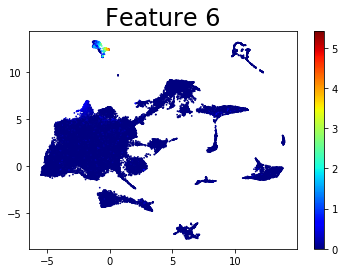

Number of nonzero cells 13615
Percentage of nonzero cells 24.58868360694226
Max coefficient 0.4166079
Average coefficient 0.018408002


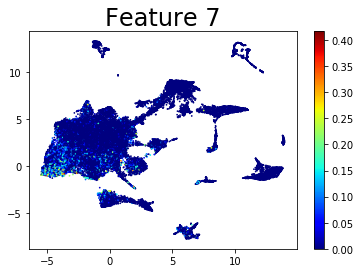

Number of nonzero cells 6733
Percentage of nonzero cells 12.159794838453342
Max coefficient 0.55788237
Average coefficient 0.007905774


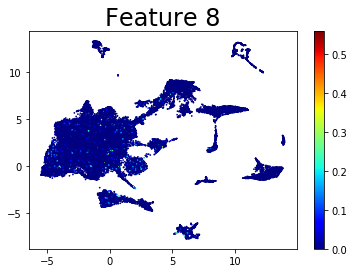

Number of nonzero cells 6068
Percentage of nonzero cells 10.958805150710662
Max coefficient 3.1153455
Average coefficient 0.066972405


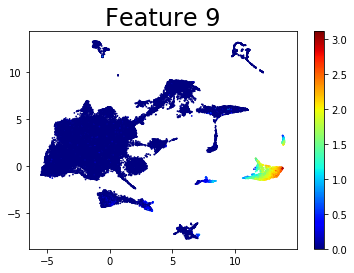

Number of nonzero cells 6139
Percentage of nonzero cells 11.08703111737191
Max coefficient 3.0047076
Average coefficient 0.0639938


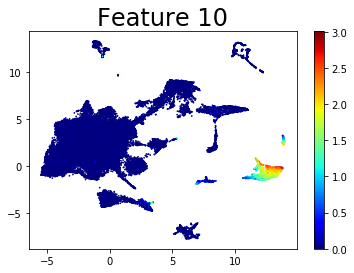

Number of nonzero cells 11743
Percentage of nonzero cells 21.20785248595835
Max coefficient 0.3613551
Average coefficient 0.01200077


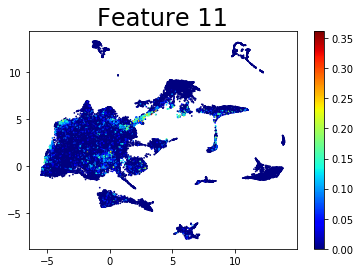

Number of nonzero cells 16540
Percentage of nonzero cells 29.871232233479617
Max coefficient 2.2951689
Average coefficient 0.044486284


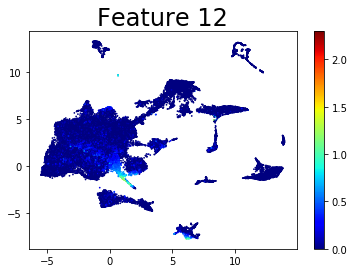

Number of nonzero cells 7669
Percentage of nonzero cells 13.850210398945295
Max coefficient 2.84665
Average coefficient 0.027802693


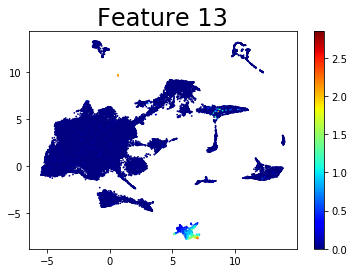

Number of nonzero cells 8364
Percentage of nonzero cells 15.105380072601182
Max coefficient 2.3583984
Average coefficient 0.034157157


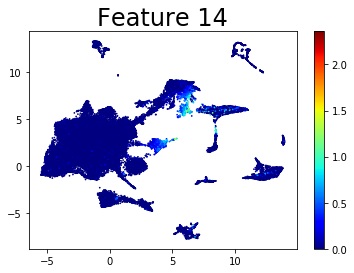

Number of nonzero cells 32611
Percentage of nonzero cells 58.89545068718283
Max coefficient 0.69072396
Average coefficient 0.090495676


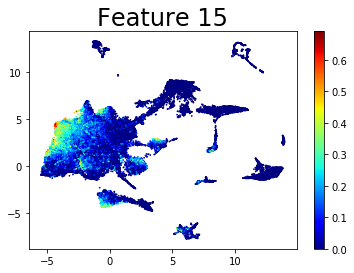

Number of nonzero cells 13552
Percentage of nonzero cells 24.474905636524536
Max coefficient 1.2713888
Average coefficient 0.03262525


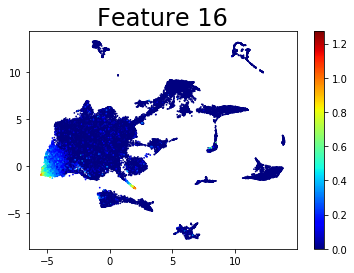

Number of nonzero cells 14468
Percentage of nonzero cells 26.129201206407686
Max coefficient 0.5919655
Average coefficient 0.020585954


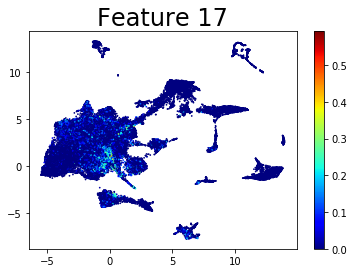

Number of nonzero cells 5850
Percentage of nonzero cells 10.565097253074713
Max coefficient 0.40474936
Average coefficient 0.0066384724


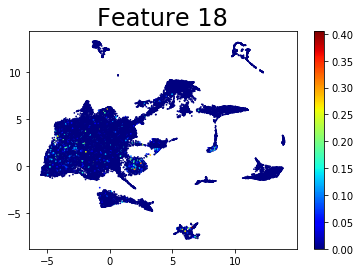

Number of nonzero cells 16972
Percentage of nonzero cells 30.651424030629755
Max coefficient 0.9563772
Average coefficient 0.038812168


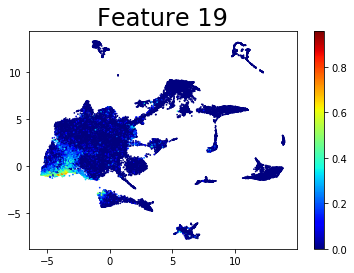

Number of nonzero cells 12289
Percentage of nonzero cells 22.19392822957866
Max coefficient 0.11737707
Average coefficient 0.0048473175


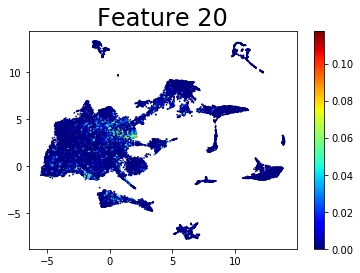

Number of nonzero cells 10058
Percentage of nonzero cells 18.164743277166746
Max coefficient 0.24344653
Average coefficient 0.004789158


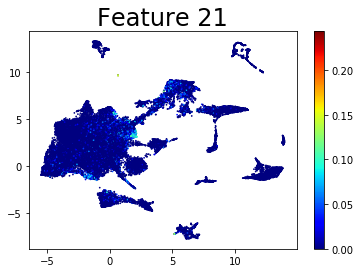

Number of nonzero cells 6963
Percentage of nonzero cells 12.575174730454568
Max coefficient 0.06623616
Average coefficient 0.0020307847


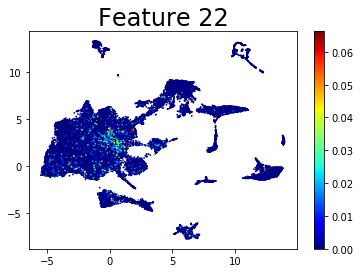

Number of nonzero cells 7488
Percentage of nonzero cells 13.523324483935633
Max coefficient 1.0397376
Average coefficient 0.03207374


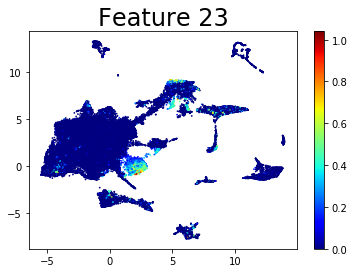

Number of nonzero cells 5890
Percentage of nonzero cells 10.63733723429232
Max coefficient 3.9893525
Average coefficient 0.02967651


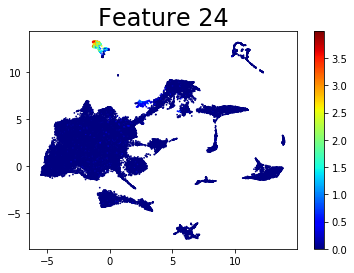

Number of nonzero cells 10498
Percentage of nonzero cells 18.959383070560403
Max coefficient 2.6765616
Average coefficient 0.017795272


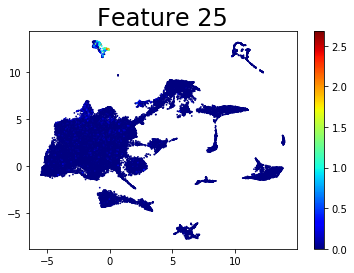

Number of nonzero cells 9338
Percentage of nonzero cells 16.86442361524986
Max coefficient 1.5689124
Average coefficient 0.023298716


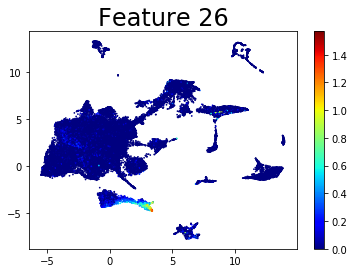

Number of nonzero cells 2769
Percentage of nonzero cells 5.000812699788698
Max coefficient 4.8799043
Average coefficient 0.004842804


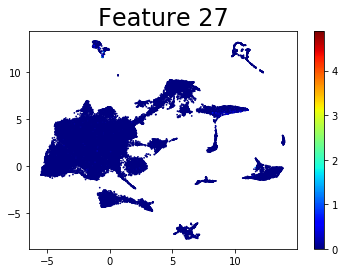

Number of nonzero cells 13345
Percentage of nonzero cells 24.10106373372343
Max coefficient 0.418077
Average coefficient 0.018849952


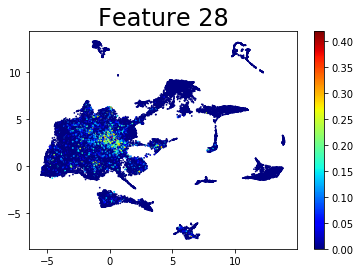

Number of nonzero cells 11982
Percentage of nonzero cells 21.639486373733543
Max coefficient 0.41751957
Average coefficient 0.015794067


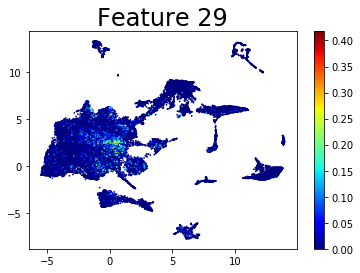

Number of nonzero cells 6195
Percentage of nonzero cells 11.188167091076556
Max coefficient 1.2281542
Average coefficient 0.0105488915


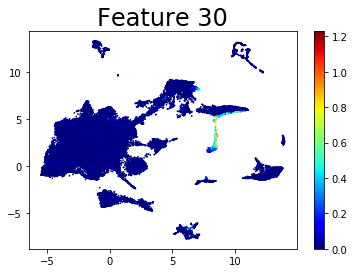

Number of nonzero cells 8982
Percentage of nonzero cells 16.221487782413178
Max coefficient 6.5068893
Average coefficient 0.08621034


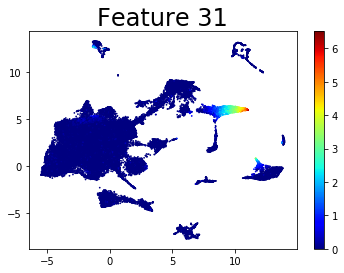

Number of nonzero cells 3412
Percentage of nonzero cells 6.162070397861696
Max coefficient 0.8410086
Average coefficient 0.0053656874


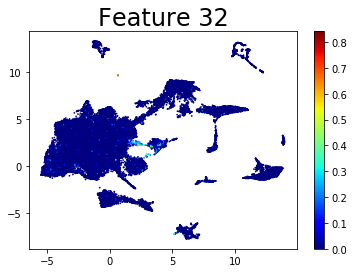

Number of nonzero cells 8821
Percentage of nonzero cells 15.930721858012317
Max coefficient 1.5195748
Average coefficient 0.024204304


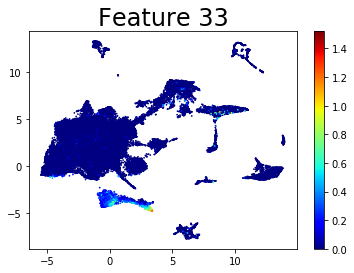

Number of nonzero cells 18418
Percentage of nonzero cells 33.26289935164617
Max coefficient 0.44912192
Average coefficient 0.030217528


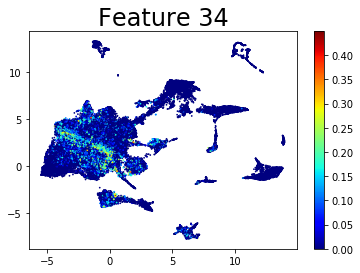

Number of nonzero cells 29505
Percentage of nonzero cells 53.286016145635806
Max coefficient 0.57329303
Average coefficient 0.07402994


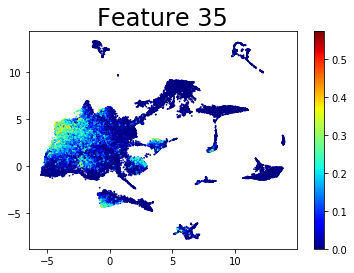

Number of nonzero cells 29356
Percentage of nonzero cells 53.016922215600225
Max coefficient 0.43603426
Average coefficient 0.076598786


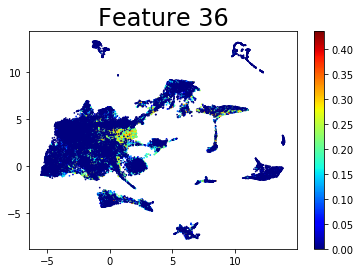

Number of nonzero cells 17448
Percentage of nonzero cells 31.511079807119252
Max coefficient 0.46379495
Average coefficient 0.02811279


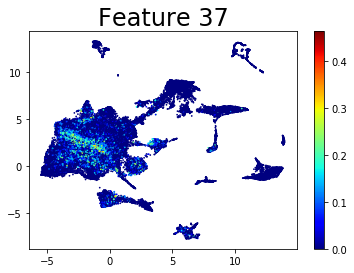

Number of nonzero cells 14378
Percentage of nonzero cells 25.96666124866808
Max coefficient 5.509613
Average coefficient 0.04908111


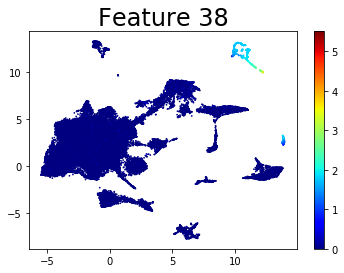

Number of nonzero cells 13074
Percentage of nonzero cells 23.611637860974156
Max coefficient 0.6492599
Average coefficient 0.019448651


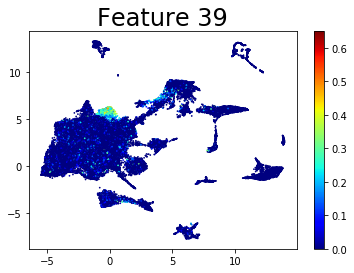

Number of nonzero cells 7556
Percentage of nonzero cells 13.646132452005563
Max coefficient 0.3625802
Average coefficient 0.007007338


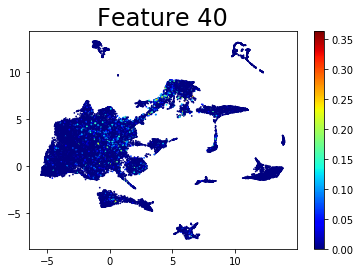

Number of nonzero cells 17038
Percentage of nonzero cells 30.7706199996388
Max coefficient 1.1534135
Average coefficient 0.038289234


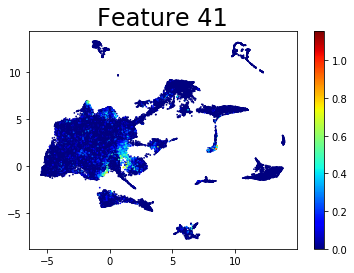

Number of nonzero cells 5973
Percentage of nonzero cells 10.78723519531885
Max coefficient 0.41352874
Average coefficient 0.006753284


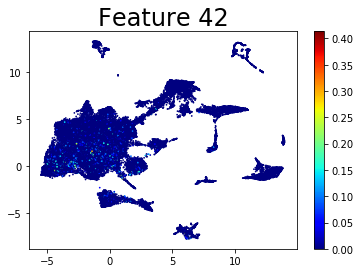

Number of nonzero cells 7987
Percentage of nonzero cells 14.424518249625255
Max coefficient 0.345381
Average coefficient 0.007836854


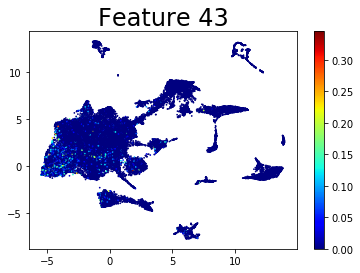

Number of nonzero cells 5130
Percentage of nonzero cells 9.264777591157825
Max coefficient 0.367889
Average coefficient 0.0049351957


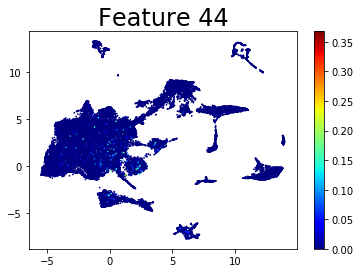

Number of nonzero cells 16408
Percentage of nonzero cells 29.63284029546152
Max coefficient 0.67994106
Average coefficient 0.037923697


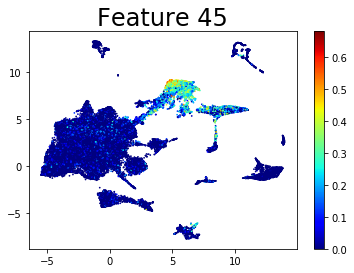

Number of nonzero cells 11024
Percentage of nonzero cells 19.909338823571908
Max coefficient 0.09544987
Average coefficient 0.002917683


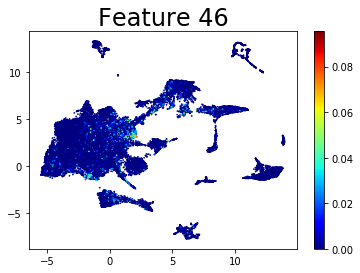

Number of nonzero cells 4404
Percentage of nonzero cells 7.953621932058298
Max coefficient 0.05523867
Average coefficient 0.0007760131


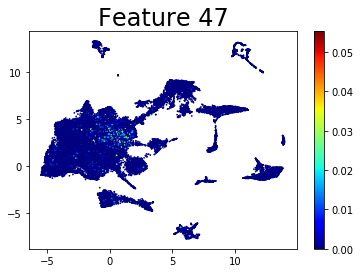

Number of nonzero cells 8459
Percentage of nonzero cells 15.276950027992992
Max coefficient 0.0733676
Average coefficient 0.0017619043


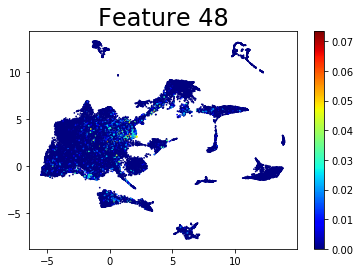

Number of nonzero cells 5562
Percentage of nonzero cells 10.044969388307958
Max coefficient 2.1423573
Average coefficient 0.03327134


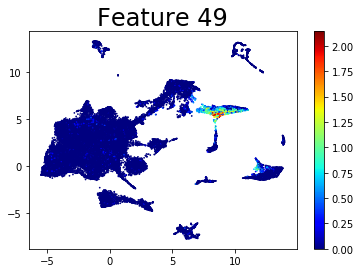

Number of nonzero cells 2354
Percentage of nonzero cells 4.251322894656048
Max coefficient 1.2029476
Average coefficient 0.0027670437


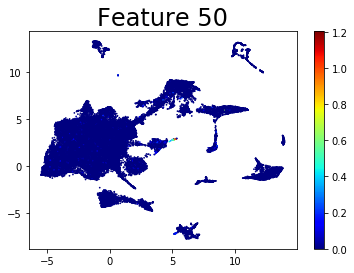

Number of nonzero cells 9537
Percentage of nonzero cells 17.223817521807444
Max coefficient 0.09058533
Average coefficient 0.002669114


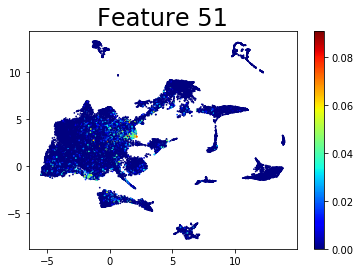

Number of nonzero cells 13436
Percentage of nonzero cells 24.26540969099348
Max coefficient 0.697827
Average coefficient 0.024278052


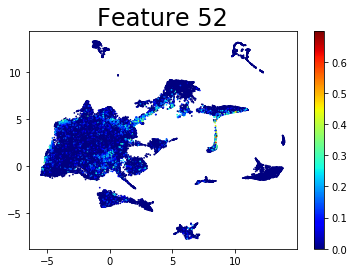

Number of nonzero cells 12042
Percentage of nonzero cells 21.74784634555995
Max coefficient 1.2978275
Average coefficient 0.023088224


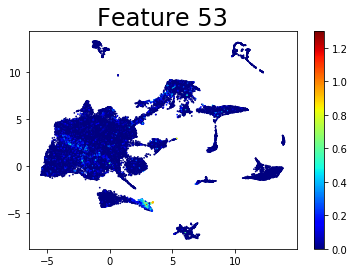

Number of nonzero cells 12561
Percentage of nonzero cells 22.685160101858372
Max coefficient 0.12161983
Average coefficient 0.004176938


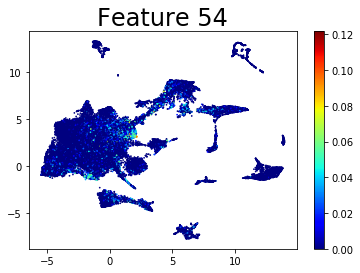

Number of nonzero cells 25979
Percentage of nonzero cells 46.918061801303935
Max coefficient 0.4706722
Average coefficient 0.035770223


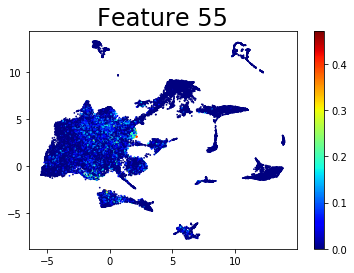

Number of nonzero cells 5515
Percentage of nonzero cells 9.960087410377273
Max coefficient 1.0613601
Average coefficient 0.012583494


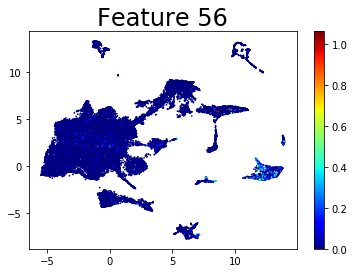

Number of nonzero cells 13473
Percentage of nonzero cells 24.332231673619763
Max coefficient 1.3417027
Average coefficient 0.05025225


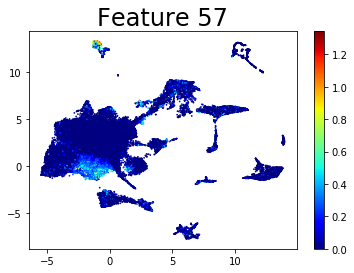

Number of nonzero cells 19912
Percentage of nonzero cells 35.96106265012371
Max coefficient 1.1299378
Average coefficient 0.053191558


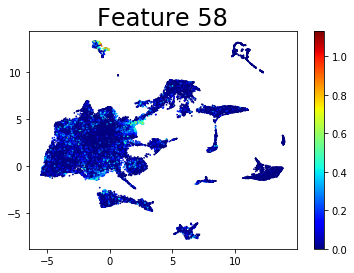

Number of nonzero cells 15347
Percentage of nonzero cells 27.716674793664552
Max coefficient 0.57550406
Average coefficient 0.022621715


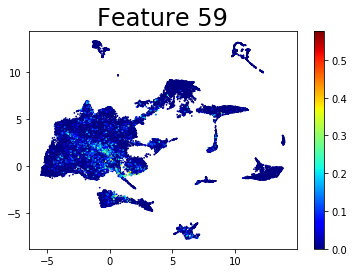

Number of nonzero cells 16311
Percentage of nonzero cells 29.45765834100883
Max coefficient 0.23348121
Average coefficient 0.01616806


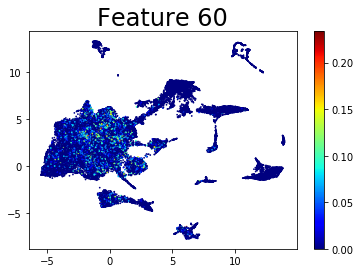

Number of nonzero cells 6118
Percentage of nonzero cells 11.049105127232666
Max coefficient 0.047014337
Average coefficient 0.00079589384


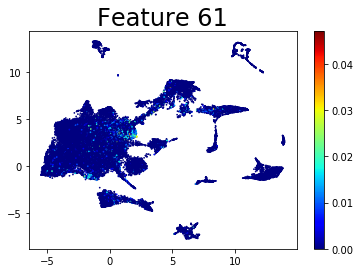

Number of nonzero cells 6551
Percentage of nonzero cells 11.831102923913239
Max coefficient 1.7359079
Average coefficient 0.02629206


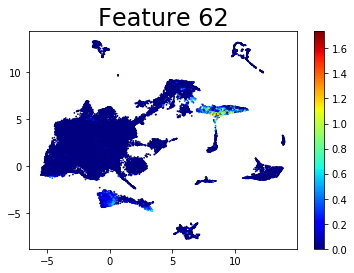

Number of nonzero cells 21274
Percentage of nonzero cells 38.42083401058316
Max coefficient 0.4115563
Average coefficient 0.03395939


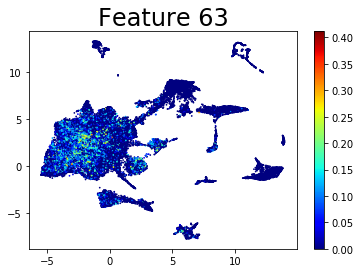

Number of nonzero cells 9962
Percentage of nonzero cells 17.991367322244496
Max coefficient 2.8136182
Average coefficient 0.0766245


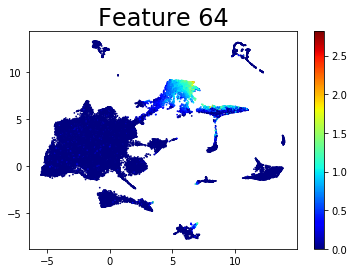

Number of nonzero cells 19193
Percentage of nonzero cells 34.66254898773726
Max coefficient 0.3788728
Average coefficient 0.029744742


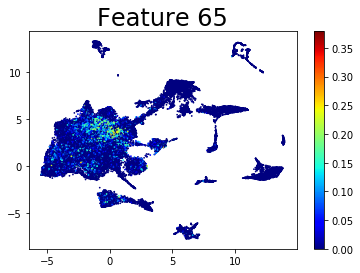

Number of nonzero cells 19643
Percentage of nonzero cells 35.47524877643532
Max coefficient 0.33837485
Average coefficient 0.01986346


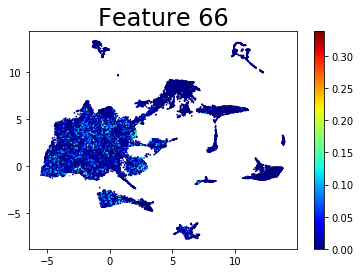

Number of nonzero cells 16620
Percentage of nonzero cells 30.01571219591483
Max coefficient 1.8962464
Average coefficient 0.036031548


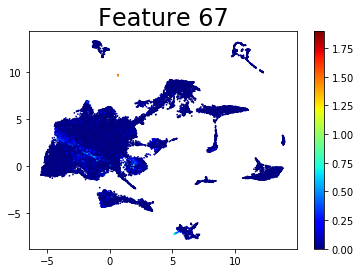

Number of nonzero cells 16125
Percentage of nonzero cells 29.12174242834697
Max coefficient 0.60068786
Average coefficient 0.03319368


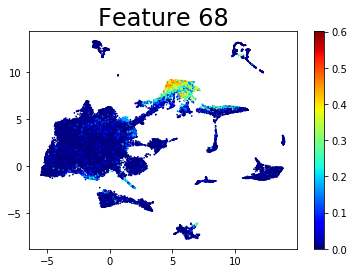

Number of nonzero cells 8143
Percentage of nonzero cells 14.706254176373914
Max coefficient 1.7112333
Average coefficient 0.014633086


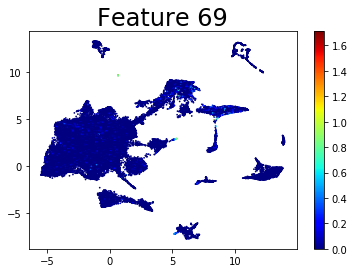

Number of nonzero cells 16838
Percentage of nonzero cells 30.409420093550775
Max coefficient 0.3671308
Average coefficient 0.018050805


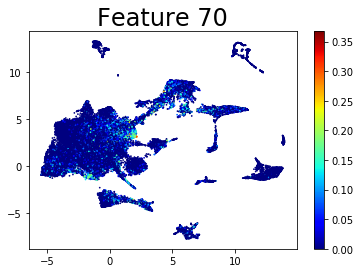

Number of nonzero cells 10870
Percentage of nonzero cells 19.631214895884128
Max coefficient 0.33174613
Average coefficient 0.011986074


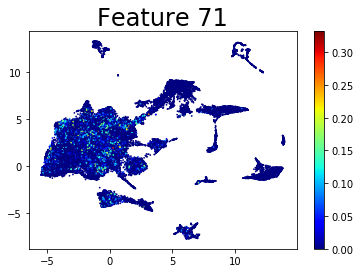

Number of nonzero cells 14592
Percentage of nonzero cells 26.35314514818226
Max coefficient 0.6069549
Average coefficient 0.026763396


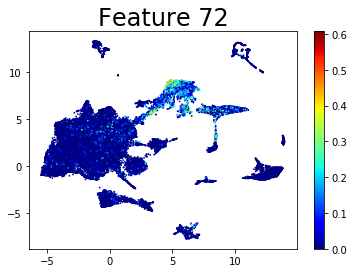

Number of nonzero cells 10454
Percentage of nonzero cells 18.879919091221037
Max coefficient 0.44946748
Average coefficient 0.015138238


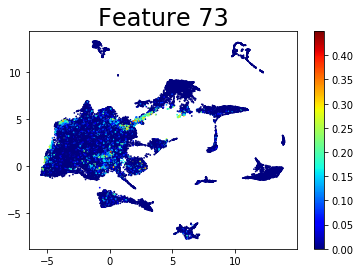

Number of nonzero cells 5924
Percentage of nonzero cells 10.698741218327283
Max coefficient 0.05605458
Average coefficient 0.0010514644


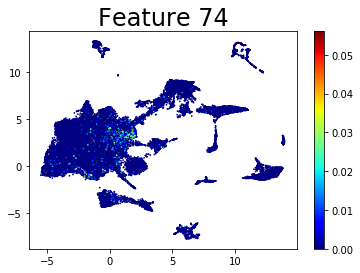

Number of nonzero cells 15356
Percentage of nonzero cells 27.732928789438517
Max coefficient 4.415162
Average coefficient 0.03041538


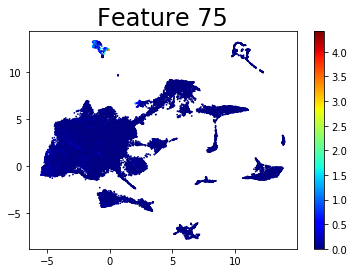

Number of nonzero cells 12194
Percentage of nonzero cells 22.02235827418685
Max coefficient 0.18971217
Average coefficient 0.009090182


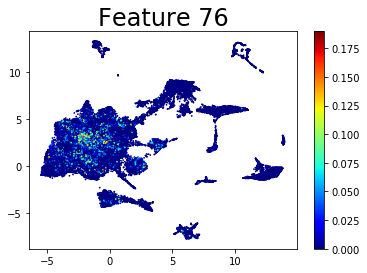

Number of nonzero cells 8991
Percentage of nonzero cells 16.237741778187136
Max coefficient 0.10713222
Average coefficient 0.0037465997


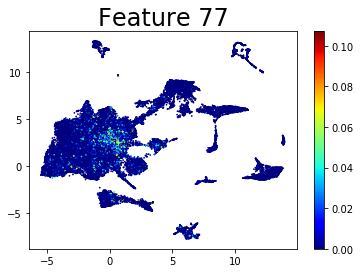

Number of nonzero cells 6177
Percentage of nonzero cells 11.155659099528634
Max coefficient 0.6858374
Average coefficient 0.011759709


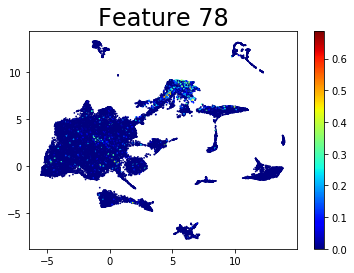

Number of nonzero cells 7932
Percentage of nonzero cells 14.325188275451048
Max coefficient 0.30488482
Average coefficient 0.0059908642


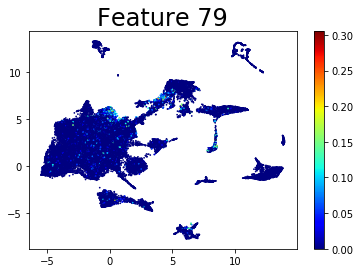

Number of nonzero cells 3340
Percentage of nonzero cells 6.032038431670008
Max coefficient 2.0137687
Average coefficient 0.017679725


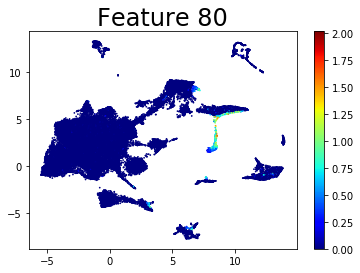

In [7]:
ProjectPy.projection_object.featurePlots(dataset_filtered, 80, 'retinaProject', 'retinaUMAP')